Monte Carlo integration
=======================

Imagine that we want to measure the area of a pond with arbitrary shape.
Suppose that this pond is in the middle of a field with known area $A$.
If we throw $N$ stones randomly, such that they land within the
boundaries of the field, and we count the number of stones that fall in
the pond $N_{in}$, the area of the pond will be approximately
proportional to the fraction of stones that make a splash, multiplied by
$A$: $$A_{pond}=\frac{N_{in}}{N}A.$$ This simple procedure is an example
of the “Monte Carlo” method.

Simple Monte Carlo integration
------------------------------

More generally, imagine a rectangle of height $H$ in the integration
interval $[a,b]$, such that the function $f(x)$ is within its
boundaries. Compute $n$ pairs of random numbers $(x_i,y_i)$ such that
they are uniformly distributed inside this rectangle. The fraction of
points that fall within the area contained below $f(x)$, <span>*i.
e.*</span>, that satisfy $y_i \leq f(x_i)$ is an estimate of the ratio of the integral of $f(x)$ and the area of the rectangle. Hence, the
estimate of the integral will be given by:
$$\int _a^b{f(x)dx} \simeq I(N) = \frac{N_{in}}{N}H(b-a).
$$

Another Monte Carlo procedure is based on the definition:
$$\langle f \rangle=\frac{1}{(b-a)} \int _a^b{f(x)dx}.
$$ In order to determine this average, we sample the
value of $f(x)$:
$$\langle f \rangle \simeq \frac{1}{N}\sum_{i=1}^{N}f(x_i),$$ where the
$N$ values $x_i$ are distributed uniformly in the interval $[a,b]$. The
integral will be given by $$I(N)=(b-a) \langle f \rangle .$$
Monte Carlo error analysis
--------------------------

The Monte Carlo method clearly yields approximate results. The accuracy
depends on the number of values $N$ that we use for the average. A
possible measure of the error is the “variance” $\sigma^2$ defined by:
$$\sigma ^2=\langle f^2 \rangle - \langle f \rangle ^2,
$$ where
$$\langle f \rangle = \frac{1}{N} \sum_{i=1}^N f(x_i)$$ and
$$\langle f^2 \rangle = \frac{1}{N} \sum_{i=1}^{N} f(x_i)^2.$$ The
“standard deviation” is $\sigma$. However, we should expect that the
error decreases with the number of points $N$, and the quantity $\sigma$
defined above does not. Hence, this cannot be a good
measure of the error.

Imagine that we perform several measurements of the integral, each of
them yielding a result $I_n$. These values have been obtained with
different sequences of $N$ random numbers. According to the central
limit theorem, these values would be normally distributed around a mean
$\langle I
\rangle$. Suppose that we have a set of $M$ of such measurements
${I_n}$. A convenient measure of the differences of these measurements
is the “standard deviation of the means” $\sigma_M$:
$$\sigma_M ^2=\langle I^2 \rangle - \langle I \rangle ^2,
$$ where
$$\langle I \rangle = \frac{1}{M} \sum_{n=1}^M I_n$$ and
$$\langle I^2 \rangle = \frac{1}{M} \sum_{n=1}^{M} I_n^2.$$ 
It can be proven that
$$\sigma_M \approx \sigma/\sqrt{N}.
$$ This relation becomes exact in the limit of a very
large number of measurements. Note that this expression implies that the
error decreases with the square root of the number of trials, meaning
that if we want to reduce the error by a factor 10, we need 100 times
more points for the average.

### Exercise CM#.1 (guided): 
#### One dimensional integration 

1.  Write a program that implements the “hit and miss” Monte Carlo
    integration algorithm. Find the estimate $I(N)$ for the integral of
    $$f(x)=4\sqrt{1-x^2}$$ as a function of $N$, in the interval
    $(0,1)$. Choose $H=1$, and sample only the $x$-dependent part
    $\sqrt{1-x^2}$, and multiply the result by 4. Calculate the
    difference between $I(N)$ and the exact result $\pi$. This
    difference is a measure of the error associated with the Monte
    Carlo estimate. Make a log-log plot of the error as a function of
    $N$. What is the approximate functional dependence of the error on
    $N$ for large $N$?

2.  Estimate the integral of $f(x)$ using the simple Monte Carlo
    integration by averaging over $N$ points, using (\[mc\_integral2\]),
    and compute the error as a function of $N$, for $N$ up to 10,000.
    Determine the approximate functional dependence of the error on $N$
    for large $N$. How many trials are necessary to determine $I_N$ to
    two decimal places?

3.  Perform 10 measurements $I_n(N)$, with $N=10,000$ using different
    random sequences. Show in a table the values of $I_n$ and $\sigma$
    according to (\[mc\_integral2\]) and (\[mc\_sigma\]).
    Use (\[mc\_sigmam\]) to estimate the standard deviation of the
    means, and compare to the values obtained from (\[mc\_sigma2\])
    using the 100,000 values.

4.  To verify that your result for the error is independent of the
    number of sets you used to divide your data, repeat the previous
    item grouping your results in 20 groups of 5,000 points each.


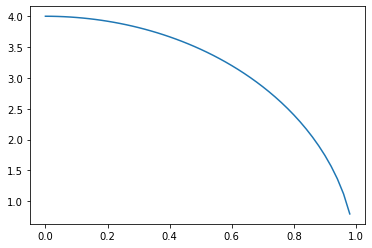

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

x = np.arange(0,1,0.02)
pyplot.plot(x, 4*np.sqrt(1-x**2));

100 77 3.08 0.061592653589793045
200 141 2.82 0.3215926535897933
400 318 3.18 0.038407346410207044
800 638 3.19 0.04840734641020683
1600 1215 3.0375 0.10409265358979303
3200 2510 3.1375 0.004092653589792938
6400 5057 3.160625 0.019032346410206902
12800 10096 3.155 0.013407346410206689
25600 20105 3.14140625 0.00018640358979293836
51200 40225 3.142578125 0.000985471410206884
102400 80453 3.1426953125 0.0011026589102067774
204800 160520 3.13515625 0.006436403589793027
409600 321621 3.140830078125 0.0007625754647930805
819200 642960 3.139453125 0.0021395285897929384
1638400 1287000 3.14208984375 0.000497190160206884
3276800 2572445 3.140191650390625 0.0014010031991680272


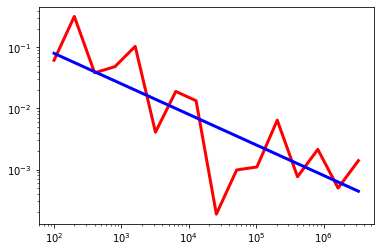

In [3]:

# Hit and miss Monte Carlo integration
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
for i in range(ngroups):

    N[i] = n0
    x = np.random.random(n0)
    y = np.random.random(n0)
    I[i] = 0.
    Nin = 0
    for j in range(n0):
        if(y[j] < np.sqrt(1-x[j]**2)):
            Nin += 1
            
    I[i] = 4.*float(Nin)/float(n0)
    E[i] = abs(I[i]-np.pi)
    print (n0,Nin,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,0.8/np.sqrt(N),ls='-',c='blue',lw=3);

pyplot.xscale('log')
pyplot.yscale('log')

### Exercise CM#.2 (challenge): 
#### Importance of randomness 

To examine the effects of a poor random number generator, modify your
program to use the linear congruential random number generator using the
parameters $a=5$, $c=0$ and the seed $x_1=1$. Repeat the integral of the
previous exercise and compare your results.

## Example

### Monte Carlo Integration

100 2.954039367819356 0.18755328577043695
200 3.2069203033769593 0.06532764978716621
400 3.1823528785061383 0.040760224916345233
800 3.144681188759477 0.0030885351696841035
1600 3.1196012688900474 0.02199138469974571
3200 3.149477895553662 0.007885241963868861
6400 3.135949005414844 0.005643648174949334
12800 3.1241575900584775 0.01743506353131563
25600 3.14685451950441 0.005261865914616859
51200 3.1389251545676204 0.00266749902217267
102400 3.138455692440567 0.003136961149226014
204800 3.145159921582526 0.00356726799273277
409600 3.1408561286401695 0.0007365249496236181
819200 3.1425897377316283 0.0009970841418351917
1638400 3.1405351262582344 0.0010575273315587275
3276800 3.141135810675188 0.0004568429146050157


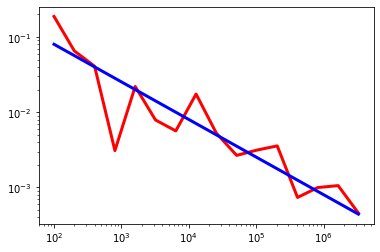

In [4]:
# Simple Monte Carlo Integration
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
for i in range(ngroups):

    N[i] = n0
    r = np.random.random(n0)
    I[i] = 0.
    for j in range(n0):
        x = r[j]
        I[i] += np.sqrt(1-x**2)
        
    I[i] *= 4./float(n0)
    E[i] = abs(I[i]-np.pi)
    print (n0,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,0.8/np.sqrt(N),ls='-',c='blue',lw=3);
pyplot.xscale('log')
pyplot.yscale('log')

In [5]:
n0 = int(2**26)
print("Total samples: ", n0)
I = np.zeros(n0)
r = np.random.random(n0)
for j in range(n0):
    x = r[j]
    I[j] = 4.*np.sqrt(1-x**2)

def group_measurements(ngroups):
    global I,n0
    
    nmeasurements = n0//ngroups
    Im = 0.
    Im2 = 0.
    for n in range(ngroups):
        Ig = 0.
        Ig2 = 0.
        for i in range(n*nmeasurements,(n+1)*nmeasurements):
            Ig += I[i]
            Ig2 += I[i]**2
        Ig /= nmeasurements
        Ig2 /= nmeasurements
        sigma = np.sqrt(Ig2-Ig**2)
        if ngroups == 1: 
            print(Ig,sigma,np.abs(Ig-np.pi))
        Im += Ig
        Im2 += Ig**2
    Im /= ngroups
    Im2 /= ngroups
    sigma = np.sqrt(Im2-Im**2)
    print(ngroups,": ",sigma,sigma/np.sqrt(ngroups),sigma/np.sqrt(nmeasurements))
    
group_measurements(int(1))
print("=============================")
group_measurements(int(2))
print("=============================")
group_measurements(int(2**2))
print("=============================")
group_measurements(int(2**4))
print("=============================")
group_measurements(int(2**6))
print("=============================")
group_measurements(int(2**8))



Total samples:  67108864
3.141583722678854 0.8926866009136145 8.93091093923104e-06
1 :  0.0 0.0 0.0
2 :  7.063117711277229e-05 4.994378429962936e-05 1.2193306713776699e-08
4 :  0.0002575033238386842 0.0001287516619193421 6.286702242155376e-08
16 :  0.0006352855250768122 0.00015882138126920305 3.101980102914122e-07
64 :  0.0009010028852076129 0.00011262536065095161 8.798856300855594e-07
256 :  0.0015840000598110419 9.900000373819012e-05 3.093750116818441e-06


Variance reduction
------------------

If the function being integrated does not fluctuate too much in the
interval of integration, and does not differ much from the average
value, then the standard Monte Carlo mean-value method should work well
with a reasonable number of points. Otherwise, we will find that the
variance is very large, meaning that some points will make small
contributions, while others will make large contributions to the
integral. If this is the case, the algorithm will be very inefficient.
The method can be improved by splitting the function $f(x)$ in two
$f(x)=f_1(x)+f_2(x)$, such that the integral of $f_1(x)$ is known, and
$f_2(x)$ as a small variance. The “variance reduction” technique,
consists then in evaluating the integral of $f_2(x)$ to obtain:
$$\int _a^b{f(x)dx}=\int _a^b {f_1(x)dx} + \int _a^b{f_2(x)dx} = \int
_a^b{f_1(x)dx}+J.$$

Importance Sampling
-------------------

Imagine that we want to sample the function $f(x)=e^{-x^2}$ in the
interval $[0,1]$. It is evident that most of our points will fall in the
region where the value of $f(x)$ is very small, and therefore we will
need a large number of values to achieve a decent accuracy. A way to
improve the measurement by reducing the variance is obtained by
“importance sampling”. As the name says, the idea is to sample the
regions with larger contributions to the integral. For this goal, we
introduce a probability distribution $P(x)$ normalized in the interval
of integration $$\int _a^b{P(x)dx} = 1.$$ Then, we can rewrite the
integral of $f(x)$ as $$I=\int _a^b{\frac{f(x)}{P(x)}P(x)dx}
$$ We can evaluate this integral, by sampling
according to the probability distribution $P(x)$ and evaluating the sum
$$I(N)=\frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{P(x_i)}.
$$ Note that for the uniform case $P(x)=1/(b-a)$, the
expression reduces to the simple Monte Carlo integral.

We are free to choose $P(x)$ now. We wish to do it in a way to reduce
and minimize the variance of the integrand $f(x)/P(x)$. The way to to
this is picking a $P(x)$ that mimics $f(x)$ where $f(x)$ is large. if we
are able to determine an appropriate $P(x)$, the integrand will be slowly
varying, and hence the variance will be reduced. Another consideration
is that the generation of points according to the distribution $P(x)$
should be a simple task. As an example, let us consider again the
integral $$I=\int _0^1 {e^{-x^2}dx}.$$ A reasonable choice for a weigh
function is $P(x)=Ae^{-x}$, where $A$ is a normalization constant.

Notice that for $P(x)=f(x)$ the variance is zero! This is known as the
zero variance property. There is a catch, though: The probability function
$P(x)$ needs to be normalized, implying that in reality, $P(x)=f(x)/\int f(x)dx$, which
assumes that we know in advance precisely the integral that we are trying to calculate!

### Exercise CM#.3 (guided): 
#### Importance sampling 

1.  Choose the weight function $P(x)=e^{-x}$ and evaluate the integral:
    $$\int _0^{\infty} {x^{3/2}e^{-x}dx}.$$

2.  Choose $P(x)=e^{-ax}$ and estimate the integral
    $$\int _0^{\pi} \frac{dx}{x^2+\cos ^2{x}}.$$ Determine the value of
    $a$ that minimizes the variance of the integral.



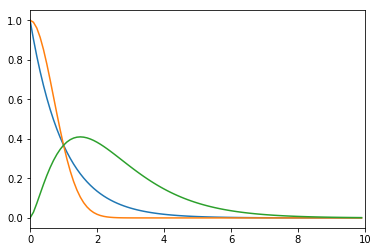

In [6]:
pyplot.xlim(0,10)
x = np.arange(0,10,0.1)
pyplot.plot(x,np.exp(-x));
pyplot.plot(x,np.exp(-x**2));
pyplot.plot(x,x**1.5*np.exp(-x));

In [7]:
# Trapezoidal integration
def trapezoids(func, xmin, xmax, nmax):
    Isim = func(xmin)+func(xmax)
    h = (xmax-xmin)/nmax
    for i in range(1,nmax):
        x = xmin+i*h
        Isim += 2*func(x)

    Isim *= h/2
    return Isim

def f(x):
    return x**1.5*np.exp(-x)
    
    
print("Trapezoids: ", trapezoids(f, 0., 20., 100000))

# Simple Monte Carlo integration
n0 = 1000000
r = np.random.random(n0)

Itot = np.sum(r**1.5*np.exp(-r))
print("Simple Monte Carlo: ", Itot/n0)

x = -np.log(r)
Itot = np.sum(x**1.5)
print("Importance Sampling: ", Itot/n0)

Trapezoids:  1.3293401896452883
Simple Monte Carlo:  0.20055380076019683
Importance Sampling:  1.3309326109393844


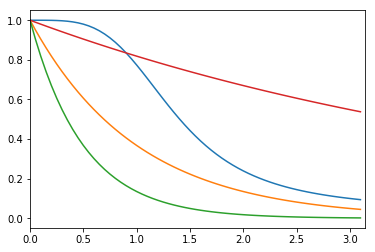

In [8]:
pyplot.xlim(0,np.pi)
x = np.arange(0,np.pi,0.05)
pyplot.plot(x,1./(x**2+np.cos(x)**2));
pyplot.plot(x,np.exp(-x));
pyplot.plot(x,np.exp(-2*x));
pyplot.plot(x,np.exp(-0.2*x));

Trapezoids:  1.5811879708476726
Simple Monte Carlo:  1.5805522238977725
Importance Sampling:
0.1 1.5269139849944797 0.0010175215024067774
0.2 1.4990666261710495 0.0006507736490908213
0.30000000000000004 1.491214975382505 0.0004903004050121477
0.4 1.498458290263806 0.00039712570165597623
0.5 1.5158270718615954 0.00033307661682631216
0.6 1.5390469117057257 0.0002817175384606266
0.7000000000000001 1.5620688736880735 0.00023165065121186605
0.8 1.5789785394113327 0.0001706691428049078
0.9 1.5841606893706248 5.726949557633722e-05
1.0 1.5733843216588894 0.00015723044798692816
1.1 1.544578228718393 0.00023298632731769597
1.2000000000000002 1.4981114279074577 0.0002892442457576181
1.3000000000000003 1.4366936235522594 0.00033254282619671197
1.4000000000000001 1.364468405819366 0.0003646769112224606
1.5000000000000002 1.2857788225163147 0.00038656680034635123
1.6 1.2046740315145976 0.00039929452395424464
1.7000000000000002 1.124551574526792 0.0004044438149321845
1.8000000000000003 1.047531391223

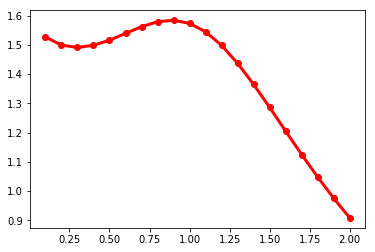

In [9]:
# Trapezoidal integration

def g(x):
    return 1./(x**2+np.cos(x)**2)

print("Trapezoids: ", trapezoids(g, 0., np.pi, 1000000))

# Simple Monte Carlo integration
n0 = 10000000
a = np.arange(0.1,2.1,0.1)
I = np.arange(0.1,2.1,0.1)

r = np.random.random(n0)

I0 = np.sum(1./((r*np.pi)**2+np.cos(r*np.pi)**2))
print("Simple Monte Carlo: ", I0/n0*np.pi)

# Importance Sampling
print("Importance Sampling:")
x = -np.log(r)
              
i = 0
for ai in a:
    norm = (1.-np.exp(-ai*np.pi))/ai
    x1 = norm*x/ai
    Itot = 0.
    Nin = 0
    I2 = 0.
    for xi in x1:
        if(xi <= np.pi):
            Nin += 1
            Itot += g(xi)*np.exp(xi*ai)
            I2 += (g(xi)*np.exp(xi*ai))**2

    Itot *= norm
    I2 *= norm

    I[i] = Itot/Nin
    i += 1
    print(ai,Itot/Nin,np.sqrt(abs(Itot**2/Nin**2-I2/Nin))/np.sqrt(Nin))
    
pyplot.plot(a,I,ls='-',marker='o',c='red',lw=3);


### Exercise CM#.4 (guided): 
#### The Metropolis algorithm 

Use the Metropolis algorithm to sample points according to a distribution
and estimate the integral $$\int _0^4 {x^2e^{-x}dx},$$ with
$P(x)=e^{-x}$ for $0 \leq x \leq 4$. Plot the number of times the
walker is at points $x_0$, $x_1$, $x_2$, ... Is the integrand sampled
uniformly? If not, what is the approximate region of $x$ where the
integrand is sampled more often?

Trapezoids:  1.5237933888733828
Metropolis:  1.5192473937773794


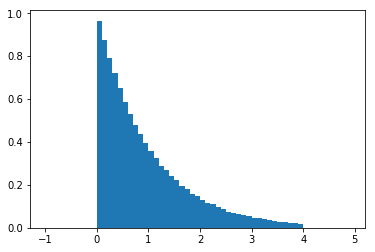

In [10]:
delta = 2
xmin = 0.
xmax = 4.

def f(x):
    return x**2*np.exp(-x)

def P(x):
    global xmin, xmax
    if(x < xmin or x > xmax):
        return 0.
    return np.exp(-x)


def metropolis(xold):
    global delta
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = P(xtrial)/P(xold)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    elif(weight != 0):
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew


xwalker = (xmax+xmin)/2.
for i in range(100000):
    xwalker = metropolis(xwalker)

I0 = 0.
N = 300000

x = np.zeros(N)

x[0] = xwalker
for i in range(1,N):
    for j in range(20):
        xwalker = metropolis(xwalker)
    x[i] = xwalker
    I0 += x[i]**2

binwidth=0.1
pyplot.hist(x,bins=np.arange(xmin-1, xmax+1, 0.1),density=True);

print("Trapezoids: ", trapezoids(f,xmin,xmax,100000))
print("Metropolis: ", I0*(1.-np.exp(-4.))/N)

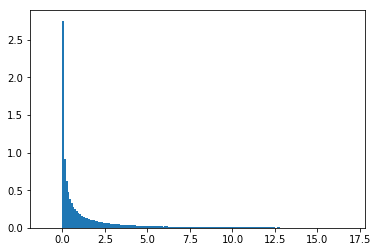

In [11]:
pyplot.hist(x**2,bins=np.arange(xmin**2-1, xmax**2+1, 0.1),density=True);


### Exercise CM#.5 (challenge):

- Calculate the integral $\int_0^1 x^2 dx=1/3$ using simple MC integration and importance sampling with $P(x)=x$.

- Calculate the integral $\int_0^1 \sqrt{x}dx=2/3$ using simple MC integration and $P(x)=1-e^{-ax}$. Find the values of $a$ that minimizes the variance.

In [1]:
# Exercise CM#.2 Solution

100 82 3.28 0.1384073464102067
200 157 3.14 0.0015926535897929917
400 310 3.1 0.04159265358979303
800 616 3.08 0.061592653589793045
1600 1223 3.0575 0.08409265358979301
3200 2483 3.10375 0.03784265358979333
6400 4984 3.115 0.026592653589792903
12800 10013 3.1290625 0.012530153589793258
25600 20027 3.12921875 0.012373903589792956
51200 40190 3.13984375 0.0017489035897932936
102400 80473 3.1434765625 0.001883908910206955
204800 160752 3.1396875 0.0019051535897931515
409600 321431 3.138974609375 0.0026180442147931693
819200 640533 3.1276025390625 0.013990114527293152
1638400 1278634 3.1216650390625 0.01992761452729308


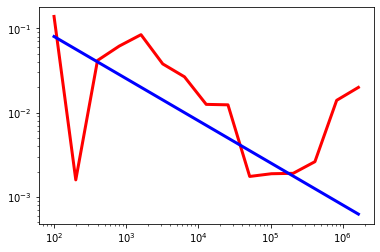

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  6 16:02:23 2020

@author: giannacs
"""

import numpy as np
from matplotlib import pyplot

ngroups = 15
n0 = 100
coef = 5265347
bigint = 65371367367
seedx = 1.
seedy = 2


I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)


for i in range(ngroups):

    N[i] = n0
    x = np.zeros(n0)
    y = np.zeros(n0)
    x1 = np.zeros(n0)
    y1 = np.zeros(n0)
    for k in range(n0):
        x[0] = seedx
        y[0] = seedy
        x[k] = (coef*x[k-1])%bigint
        y[k] = (coef*y[k-1])%bigint
        x1[k] = float(x[k])/float(bigint)           #normalized Random Numbers from LRNG
        y1[k] = float(y[k])/float(bigint)           #normalized Random Numbers from LRNG
    

    I[i] = 0.
    Nin = 0
    for j in range(0,n0-1):
        if(y1[j] < np.sqrt(1-x1[j]**2)):
            Nin += 1
            
    I[i] = 4.*float(Nin)/float(n0)
    E[i] = abs(I[i]-np.pi)
    print (n0,Nin,I[i],E[i])
    
    n0 = 2*n0
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,0.8/np.sqrt(N),ls='-',c='blue',lw=3);

pyplot.xscale('log')
pyplot.yscale('log')



#We see that the approximation is worse using an linear random number generator (LNRG)
#Therefore it is important to have uncorrelated numbers to perform the integration. 


In [1]:
#Calculation of the integral  ∫10𝑥2𝑑𝑥=1/3  using simple MC integration and importance sampling with  𝑃(𝑥)=𝑥

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 14:54:06 2020

@author: christos
"""

import numpy as np

xmin = 0
xmax = 1

def f(x):
    return x**2

def P(x):
    global xmin, xmax
    if(x < xmin or x > xmax):
        return 0.
    return x

n0 = 1000000
r = np.random.random(n0)
p = np.random.random(n0)
    
Itot = np.sum((r**2)/p)
print("Simple Monte Carlo: ", Itot/(10*n0))


#Compare with Simpson's Trapezoidal Integration 


def trap_integrator(func, a, b, N):
    
    h = (b-a)/N
    n = np.arange(0,N)
    sum1 = 0

    for i in n[1:N-1] :
        sum1 = sum1 + func(a + (i*h))
        
    sum2 = 0.5 * (func(a) + func(b))
    total_sum = h * (sum1 + sum2)
    
    
    return total_sum

print("Trapezoidal Integration Result: ", trap_integrator(f,0,1,10000))

Simple Monte Carlo:  0.47418136733484045
Trapezoidal Integration Result:  0.3332333549989983


In [11]:
# Calculation of the integral  ∫10𝑥⎯⎯√𝑑𝑥=2/3  using simple MC integration and  𝑃(𝑥)=1−𝑒−𝑎𝑥 .
# Finding the values of  𝑎  that minimizes the variance.
#Note: you might have to press Shift + Enter twice for the plot to appear

Trapezoidal Integration Result:  0.6665664641972324
Importance Sampling:
0.1 0.6377151618775411 0.029754440353162655
0.2 0.6681324856702173 0.02594149094025977
0.30000000000000004 0.6636244890789438 0.02375269475996721
0.4 0.6609026021630215 0.02327778476983371
0.5 0.6438479564867485 0.02290775341274728
0.6 0.6354771972067443 0.02313401714110812
0.7000000000000001 0.6403194208834444 0.023855355000192712
0.8 0.6282688184312892 0.023910569047061764
0.9 0.6047599484577428 0.02392635586902353
1.0 0.5890326814575652 0.02435904333297051
1.1 0.562335261923217 0.024285510706139334
1.2000000000000002 0.551746865222825 0.025144033424036788
1.3000000000000003 0.5273442381425718 0.02519101077091015
1.4000000000000001 0.5015345236861061 0.025136541122576444
1.5000000000000002 0.5062104236527882 0.02728784392630931
1.6 0.4809698912707502 0.027104234941530754
1.7000000000000002 0.45743427556462607 0.02703732397094587
1.8000000000000003 0.4238795181750266 0.025915365634509156
1.9000000000000001 0.4011

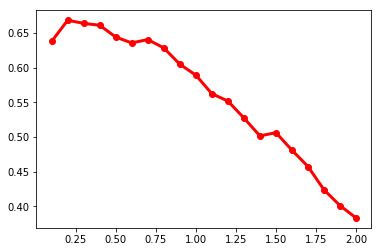

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 15:49:48 2020

@author: christos
"""

import numpy as np
from matplotlib import pyplot


def f(x):
    return np.sqrt(x)

def trap_integrator(func, a, b, N):
    
    h = (b-a)/N
    n = np.arange(0,N)
    sum1 = 0

    for i in n[1:N-1] :
        sum1 = sum1 + func(a + (i*h))
        
    sum2 = 0.5 * (func(a) + func(b))
    total_sum = h * (sum1 + sum2)
    
    
    return total_sum

print("Trapezoidal Integration Result: ", trap_integrator(f,0,1,10000))

n0 = 1000
a = np.arange(0.1,2.1,0.1)
I = np.arange(0.1,2.1,0.1)
r = np.random.random(n0)

print("Importance Sampling:")
x = -np.log(r)

             
i = 0
for ai in a:
    norm = (1.-np.exp(-ai))/ai
    x1 = norm*x/ai
    Itot = 0.
    Nin = 0
    I2 = 0.
    for xi in x1:
        if(xi <= 1):
            Nin += 1
            Itot += f(xi)/np.exp(-xi*ai)
            I2 += (f(xi)/np.exp(-xi*ai))**2

    Itot *= norm
    I2 *= norm

    I[i] = Itot/Nin
    i += 1
    print(ai,Itot/Nin,np.sqrt(abs(Itot**2/Nin**2-I2/Nin))/np.sqrt(Nin))
    
pyplot.plot(a,I,ls='-',marker='o',c='red',lw=3);


#in my first trial run the value that minimizes the variance is a = 0.1.
#It is also the value that approximates the integral closest to its actual value
